# EECS3401 - Group Project - Group 2 #
    
## CO2 emission prediction ##

### frame ### 
supervised: as the target value(CO2) emmision is provided as label
        
model-based: regression model is used to make the prediction

batch-learning: as of now, we have no plan to make this model to be trained with future incomming new data

### 1. Dataset acquisition ###

In [10]:
%pip install pandas
%pip install requests
%pip install scikit-learn




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/ce/41/5d882544fddba1ae476c240cdf4499743ea84bfeb54456d472966dc86355/scikit_learn-1.4.1.post1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/1e/84/ccd9b08653022b7785b6e3ee070ffb2825841e0dc119be22f0840b2b35cb/threadpoolctl-3.4.0-py3-none-any.whl.

In [11]:
import pandas as pd
import requests as rq
from io import StringIO

In [12]:
url = 'https://raw.githubusercontent.com/jewbe22/eecs3401-group2-groupProject/main/data/Fuel_Consumption_Ratings_2023.csv'
download = rq.get(url).content

co2_emission = pd.read_csv(StringIO(download.decode(errors='ignore')), sep=',', engine='python')
co2_emission

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,NaN,N = natural gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
852,Fuel consumption,City and highway fuel consumption ratings are ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,CO2 emissions,the tailpipe emissions of carbon dioxide (in g...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,CO2 rating,the tailpipe emissions of carbon dioxide rated...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. EDA ###

<class 'pandas.core.frame.DataFrame'>
Index: 833 entries, 0 to 832
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        833 non-null    object 
 1   Make                        833 non-null    object 
 2   Model                       833 non-null    object 
 3   Vehicle Class               833 non-null    object 
 4   Engine Size (L)             833 non-null    float64
 5   Cylinders                   833 non-null    float64
 6   Transmission                833 non-null    object 
 7   Fuel Type                   833 non-null    object 
 8   Fuel Consumption (L/100Km)  833 non-null    float64
 9   Hwy (L/100 km)              833 non-null    float64
 10  Comb (L/100 km)             833 non-null    float64
 11  Comb (mpg)                  833 non-null    float64
 12  CO2 Emissions (g/km)        833 non-null    float64
 13  CO2 Rating                  833 non-null

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

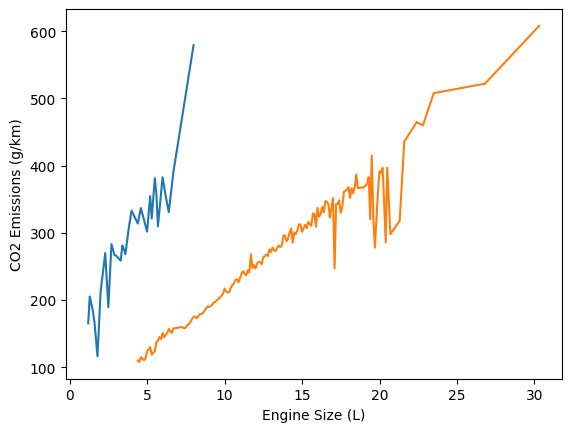

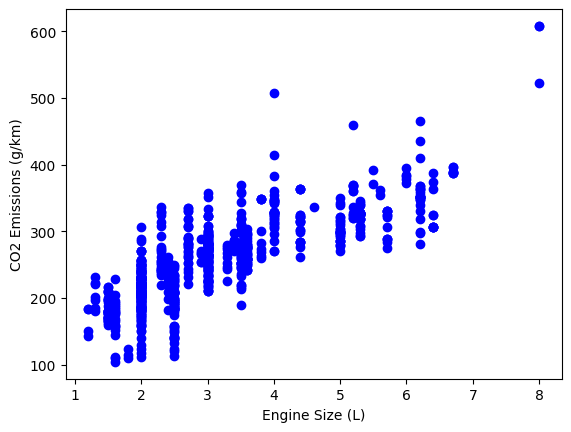

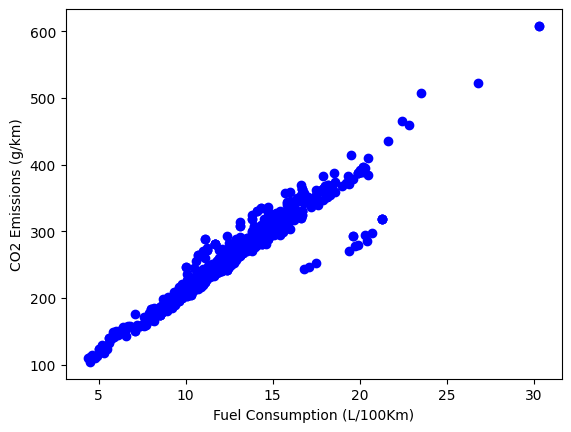

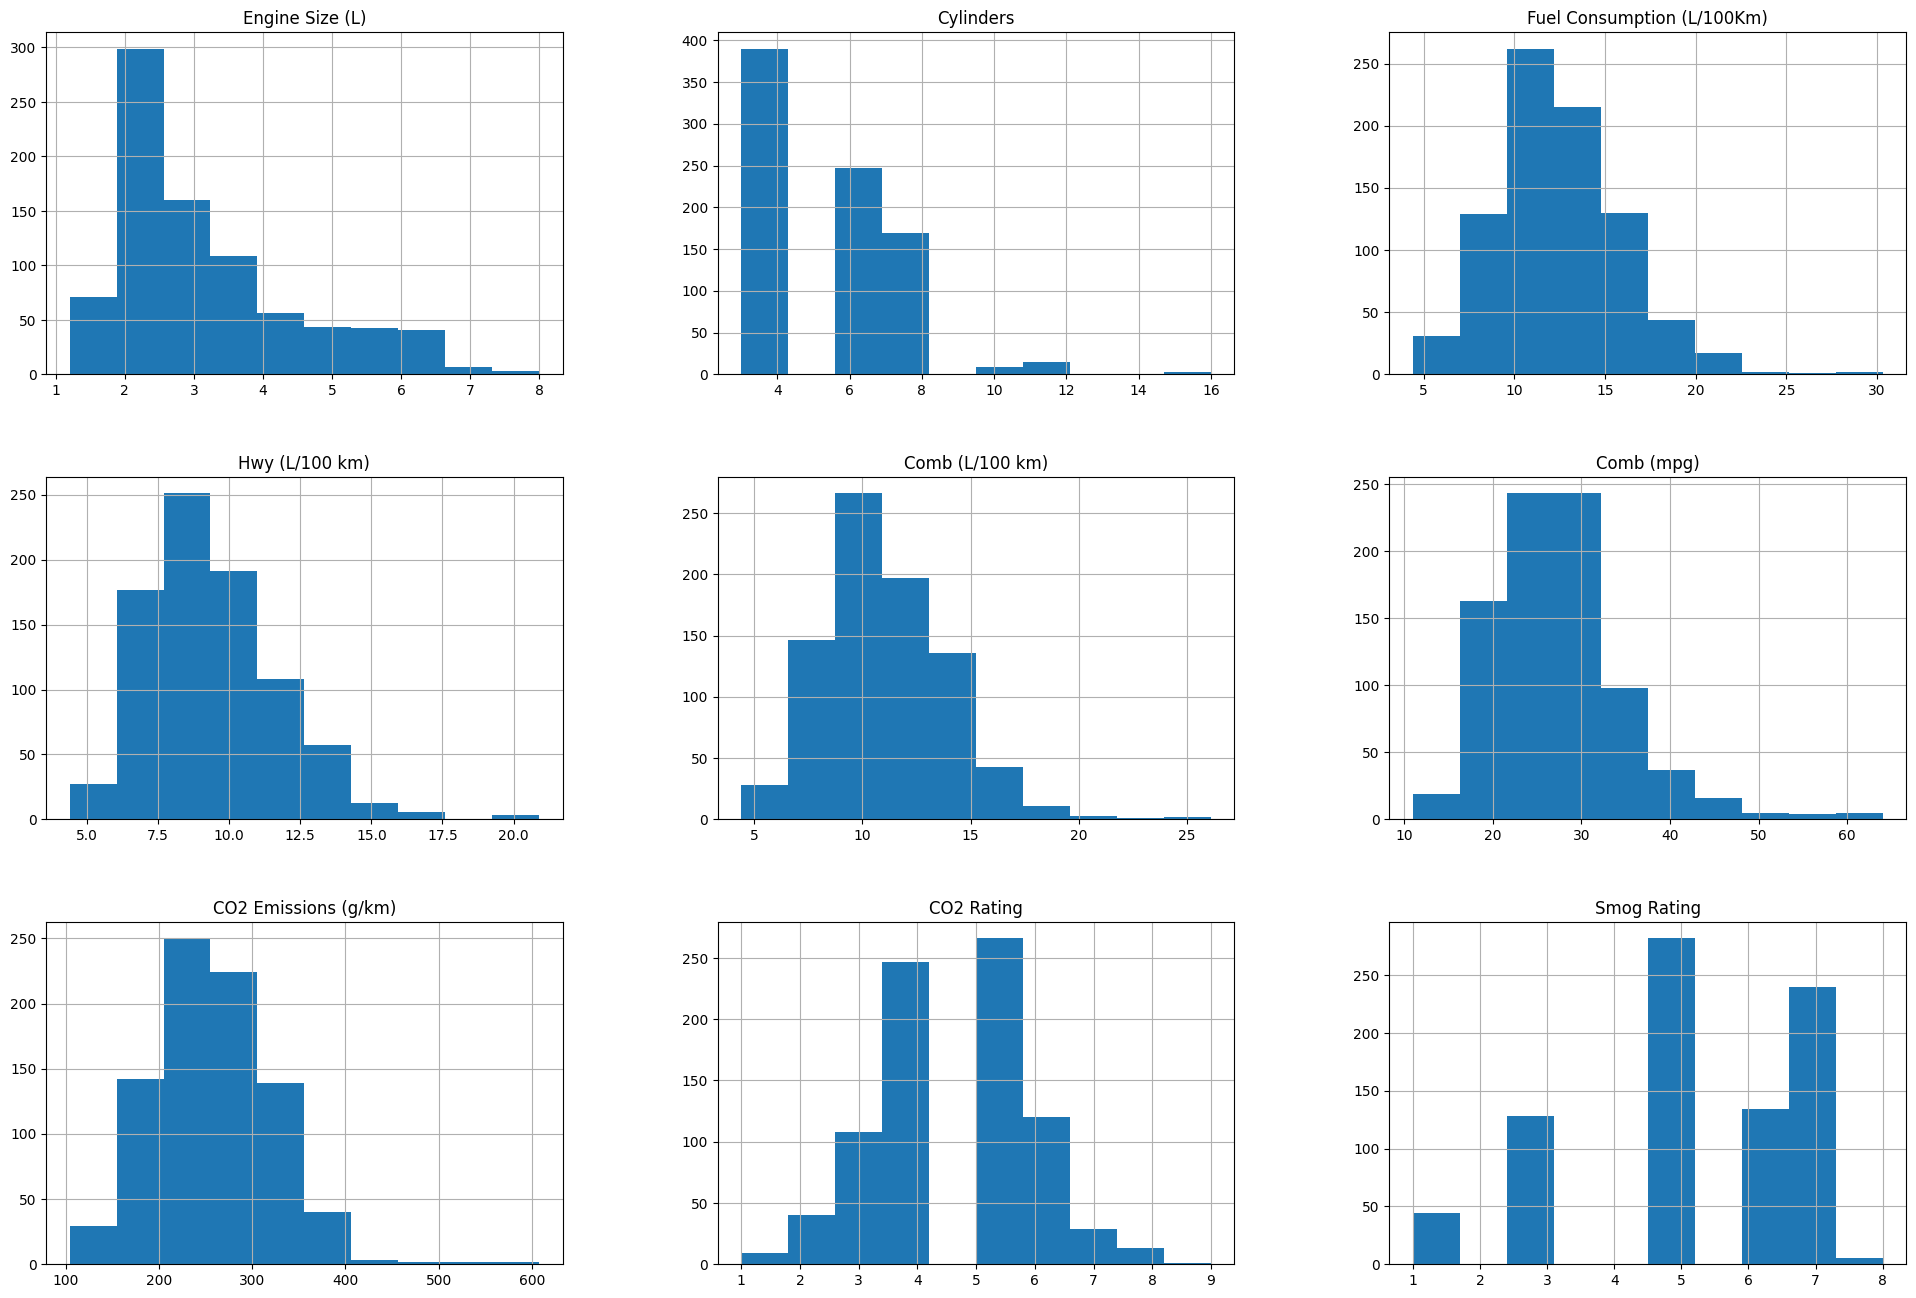

In [13]:
# todo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#rows 0-833 only contain the instances, the rest contain description of the features
co2_emission.isnull().sum()

#removing instances with null or dummy values
co2_emission.dropna(inplace=True)

co2_emission.describe()

#use this to analyze some trends i.e 75% of the average vehicle have < 3.6 engine sizes
co2_emission.info()
corr_matrix = co2_emission.corr(numeric_only=True)
corr_matrix
#finding correlations
corr_matrix["Engine Size (L)"].sort_values(ascending=False)

#correlation with respect to engine size
corr_matrix["Fuel Consumption (L/100Km)"].sort_values(ascending=False)

#correlation with respect to fuel consumption
g1 = sns.lineplot(x="Engine Size (L)", y="CO2 Emissions (g/km)", data=co2_emission, errorbar=None)
g2 = sns.lineplot(x="Fuel Consumption (L/100Km)", y="CO2 Emissions (g/km)", data=co2_emission, errorbar=None)


# Scatterplot of Engine Size vs CO2 Emissions
X1 = co2_emission["Engine Size (L)"]
y1 = co2_emission["CO2 Emissions (g/km)"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X1, y1, color = 'b')
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")



# Scatterplot of Fuel Consumption vs CO2 Emissions
X = co2_emission["Fuel Consumption (L/100Km)"]
y = co2_emission["CO2 Emissions (g/km)"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, color = 'b')
plt.xlabel("Fuel Consumption (L/100Km)")
plt.ylabel("CO2 Emissions (g/km)")
co2_emission.hist(figsize=(24, 16))
plt.show()




### 3. Data cleaning/Preprocessing ###

In [14]:
# todo

#removing irrelevant columns from the dataset
co2_emission=co2_emission.drop(['Transmission','Make','Year','Vehicle Class','Model'],axis=1)

#label encoding categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['Fuel Type']

# apply label encoding to each categorical column
for column in categorical_columns:
    co2_emission[column] = label_encoder.fit_transform(co2_emission[column])

#check to see if fuel type was changed from a categorical variable
co2_emission.head()

,Engine Size (L),Cylinders,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,1.5,4.0,3,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,1.5,4.0,3,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,1.5,4.0,3,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,3.5,6.0,3,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,3.0,6.0,3,13.8,11.2,12.4,23.0,291.0,4.0,5.0


### 4. Model training ###

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score

RANDOM_STATE = 42

In [16]:
# todo

## mocking dataset, to be deleted.
column = []
for i in range(13):
    column.append("x_" + str(i))
column.append("target")

X_train = np.random.rand(1000,13)
X_test = np.random.rand(200, 13)
y_train = np.random.randint(low=1, high=100, size=(1000,1))
y_test = np.random.randint(low=1, high=100, size=(200,1))
## mocking ends




In [17]:
linear_model = LinearRegression()
linear_params = {
    'copy_X':[True],
    'n_jobs':[None, 1, 2, 5, 10],
    'positive':[True, False]
}

In [18]:
tree_model = DecisionTreeRegressor()
tree_params = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best','random'],
    'random_state':[RANDOM_STATE]    
}

In [19]:
elastic_model = ElasticNet()
elastic_params = {
    'alpha':[0.5, 1, 1.5],
    'l1_ratio':[0.3, 0.4, 0.5, 0.6, 0.7],
    'max_iter':[2000, 4000, 8000],
    'copy_X':[True],
    'positive':[True, False],
    'random_state':[RANDOM_STATE]
}

In [20]:

scoring_methods = ['neg_mean_absolute_error', 'neg_mean_squared_error','neg_root_mean_squared_error', 'r2']

linear_best = GridSearchCV(linear_model, linear_params, scoring=scoring_methods, refit='neg_root_mean_squared_error', cv=5)
tree_best = GridSearchCV(tree_model, tree_params, scoring=scoring_methods, refit='neg_root_mean_squared_error', cv=5)
elastic_best = GridSearchCV(elastic_model, elastic_params, scoring=scoring_methods, refit='neg_root_mean_squared_error', cv=5)
models = [('Linear regression',linear_best),
          ('Decision tree regressor',tree_best),
          ('Elastic net',elastic_best)]
cv_result = {}
temp = []
for (name, model) in models:
    model.fit(X_train, y_train)
    cv_result[name] = pd.DataFrame(cross_validate(model.best_estimator_, X_train, y_train, scoring=scoring_methods ,cv=5))
    temp.append((name, model.best_estimator_))

models = temp




In [21]:
stat_columns = cv_result[models[0][0]].mean().index
statistic = pd.DataFrame(columns=stat_columns)
model_names = [models[i][0] for i in range(len(models))]
for model in model_names:
    statistic.loc[-1] = cv_result[model].mean()
    statistic.index = statistic.index + 1


statistic.index = model_names




In [22]:
statistic.sort_values(by='test_neg_root_mean_squared_error', inplace=True, ascending=False)
statistic

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error,test_r2
Elastic net,0.000996,0.001367,-25.113534,-845.306423,-29.054849,-0.003301
Linear regression,0.001222,0.001839,-25.144117,-851.949925,-29.169369,-0.011324
Decision tree regressor,0.013669,0.001565,-33.534000,-1703.486000,-41.267988,-1.032380


### 5. Performance analysis ###

In [23]:
#source : https://www.dataquest.io/blog/learning-curves-machine-learning/
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [24]:
train_size = np.arange(start=100, stop=int(X_train.shape[0] * 0.8), step=200)


In [25]:
# best_estimator = (name, estimator_object)
best_estimator = None
for pair in models:
    if pair[0] == statistic.head(1).index:
        best_estimator = (pair[0], pair[1])
        print(best_estimator[0])
        break


Elastic net


In [26]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=best_estimator[1],X=X_train, y=y_train, train_sizes=train_size, cv=5, scoring='neg_mean_absolute_error') 

In [27]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

(0.0, 40.0)

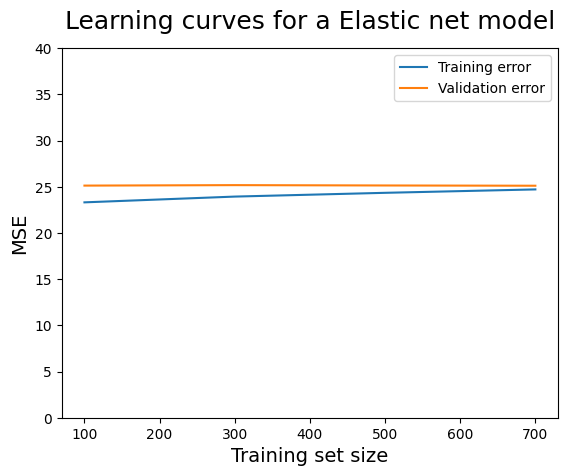

In [28]:
#plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title(f'Learning curves for a {best_estimator[0]} model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

In [45]:

%pip install statsmodels
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [29]:
#source:https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d

from statsmodels.regression.linear_model import OLS
from statsmodels.stats.diagnostic import normal_ad
import seaborn as sns



In [30]:
y_pred = best_estimator[1].predict(X_test)
olsmod = OLS(y_train, X_train).fit()
residual = olsmod.resid

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 2.2390799360154932e-15


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


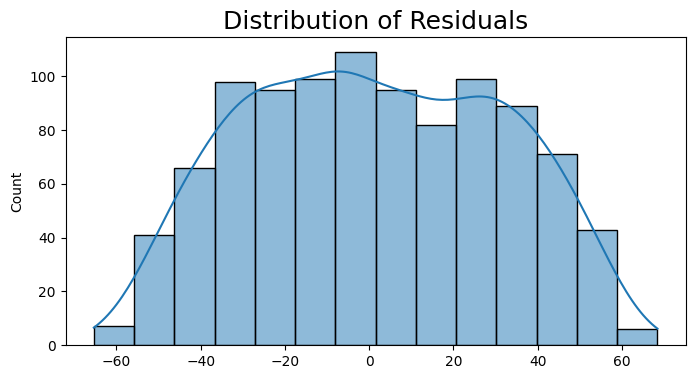

Residuals are not normally distributed


In [31]:
# Performing the test on the residuals
p_value = normal_ad(residual)[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.histplot(data=residual, kde=True)
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

In [32]:
#replace co2_emission with scaled one
plot_columns = ['actual_CO2_emission','predicted_emission']
Y = pd.DataFrame(data=np.concatenate((y_test, np.reshape(a=y_pred, newshape=y_test.shape)), axis=1),
                columns=plot_columns)


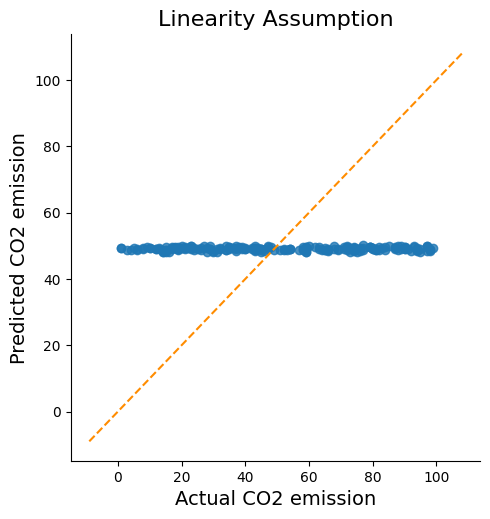

In [33]:


sns.lmplot(x=plot_columns[0], y=plot_columns[1], data=Y ,fit_reg=False)
    
# Plotting the diagonal line
line_coords = np.arange(start=Y[plot_columns].min().min()-10, 
                        stop=Y[plot_columns].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted CO2 emission', fontsize=14)
plt.xlabel('Actual CO2 emission', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()